## 广告点击率预测
这个项目的主要的目的是通过给定的广告信息和用户信息来预测一个广告被点击与否。 如果广告有很大概率被点击就展示广告，如果概率低，就不展示。 因为如果广告没有被点击，对双方（广告主、平台）来讲都没有好处。所以预测这个概率非常重要，也是此项目的目标。

在这个项目中，你需要完成以下的任务：
- ``数据的读取和理解``: 把给定的.csv文件读入到内存，并通过pandas做数据方面的统计以及可视化来更深入地理解数据。
- ``特征构造``: 从原始特征中衍生出一些新的特征，这部分在机器学习领域也是很重要的工作。
- ``特征的转化``: 特征一般分为连续型(continuous)和类别型（categorical), 需要分别做不同的处理。
- ``特征选择``: 从已有的特征中选择合适的特征，这部分也是很多项目中必不可少的部分。 
- ``模型训练与评估``: 通过交叉验证方式来训练模型，这里需要涉及到网格搜索等技术。


你需要完成标记为`TODO`的部分。 

另外，提交作业时候的注意点：
> 1. 不要试图去创建另外一个.ipynb文件，所有的程序需要在`starter_code.ipynb`里面实现。很多的模块已经帮你写好，不要试图去修改已经定义好的函数以及名字。 当然，自己可以按需求来创建新的函数。但一定要按照给定的框架来写程序，不然判作业的时候会出现很多问题。  
> 2. 作业可以讨论，但请自己完成。让我们一起遵守贪心学院的`honor code`。

好了，我们开始吧！


### 1. 数据读取和理解
对于``.CSV``的文件，我们一般使用``pandas``工具来读取，读取之后的数据会存放在``dataframe``中。在此项目中，我们使用的是``kaggle``的一个竞赛数据，具体官网地址为：https://www.kaggle.com/c/avazu-ctr-prediction 。 训练和测试数据分别为``train.csv``和``test.csv``。 官网提供的数据比较大，压缩之后的已经达到1G以上。 为了确保让所有人可以在本机上无障碍去调模型，在此项目中，我们特意去采样了一部分数据。 采样的规则为：从``train.csv``文件中读取头``400000``个样本，并重命名为``train_subset.csv``。 之后在这个数据的基础上我们会进一步分为训练集和测试集。所以解压完.zip文件后会发现只有一个``train_subset.csv``文件。 

项目中请``务必要使用``我们提供的样本(当然，你感兴趣也可以在原始样本里尝试，但提交作业时代码一定要基于我们给定的）。 这里给一个小提示： 如果你想在某一个``.csv``文件中只提取头``1000``个样本，在``linux``或者``os``下可以使用如下命令：``head -n1000 train.csv > train_subset.csv``, 意思就是从``train.csv``中提取头``1000``个样本，并存放在``train_subset.csv``中。 为了以后更好的做数据方面的处理，这些基本的命令建议大家都掌握一下。

#### 学习资料推荐 ####
- 如果对``pandas``比较生疏，或者之前没有使用过，请耐心看这份文档，帮助你马上上手：https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html  
- 如果对``numpy``比较生疏，或者之前没有接触过，请耐心看这两份文档，很实用： http://jalammar.github.io/visual-numpy/         http://cs231n.github.io/python-numpy-tutorial/ 

这些文档足够让你上手``numpy``和``pandas``

### 1.1 数据的读取

In [2]:
# 导入基本的库，每个项目的必备
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置matplotlib的模式
%matplotlib inline

# 设置matplot的样式
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
# 通过pandas读取.csv文件，并展示头几个样本。
data_df = pd.read_csv('train_subset.csv')
data_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


> ``问题1（TODO）：`` 在上面的数据中有一个特征叫作``hour``, 是时间的特征，但这个值有些看不懂... 这部分需要通过pandas来做处理。把这个数转换成具体时间的格式。请把这个特征格式化成``%y%m%d%H``形式。格式化完之后请覆盖掉原来的特征。提示： 使用 ``pd.to_datetime``函数，然后指定需要格式化的特征和格式化的样式。 

In [4]:
# TODO 把hour特征格式化成 '%y%m%d%H'形式。
temp = pd.to_datetime(data_df['hour'], format='%y%m%d%H')
data_df['hour'] = temp

In [5]:
# 重新打印一下是否有改变
data_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
# 由于特征个数比较多，有些特征被隐藏掉了（表示成了...)， 为了把所有特征全部看到，可以分两次来展示：
data_df.iloc[:, :12].head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a


In [7]:
data_df.iloc[:, 12:].head()

,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


从上述数据中，你会发现大量的特征为类别型特征，而且很多特征已经被编码成看不懂的字符串（这些都是为了不公开用户数据），但即便如此，我们也可以把它们直接看成是类别型特征（categorical featuer）。

In [8]:
# 查看一下每一个特征的类型以及是否存在null
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                399999 non-null  float64       
 1   click             399999 non-null  int64         
 2   hour              399999 non-null  datetime64[ns]
 3   C1                399999 non-null  int64         
 4   banner_pos        399999 non-null  int64         
 5   site_id           399999 non-null  object        
 6   site_domain       399999 non-null  object        
 7   site_category     399999 non-null  object        
 8   app_id            399999 non-null  object        
 9   app_domain        399999 non-null  object        
 10  app_category      399999 non-null  object        
 11  device_id         399999 non-null  object        
 12  device_ip         399999 non-null  object        
 13  device_model      399999 non-null  object        
 14  devi

hour: 格式为YYMMDDHH，因此14091123表示2014年9月11日UTC时间23:00。
C1: 匿名分类变量
banner_pos: int型，网页上的广告位置，离散特征0,1,2,3...
site_id:Site ID
site_domain:Site领域
site_category: 网站类别
app_id: string型，用户APP的ID
app_domain  用户APP的领域
app_category  用户APP的类别
device_id: 设备编号
device_ip 
device_model
device_type: 设备类型
device_conn_type:Device接入类型
C14-C21 -- anonymized categorical variables  匿名分类变量

### 1.2 数据的理解

In [9]:
#现在来看下每个属性和click的关联度(标准相关系数（standard correlation coefficient，也称作皮尔逊相关系数）)：
corr_matrix = data_df.corr()
corr_matrix["click"].sort_values(ascending = False)

click               1.000000
C16                 0.146317
banner_pos          0.038898
C19                 0.019546
C18                 0.000334
id                 -0.001338
C20                -0.022772
C15                -0.037084
device_conn_type   -0.041631
device_type        -0.045650
C1                 -0.047587
C21                -0.103256
C17                -0.117039
C14                -0.122551
Name: click, dtype: float64

#### ``id``特征 ####
我们是否需要这个特征？ 应该如何判断？ 如果发现不需要此特征就可以从data_df中删掉了。
> ``问题2（TODO）`` 1. 请判断这个特征有没有价值  2. 如果没有价值就把它从data_df中删掉。 提示： 如果对于每一个样本，``id``都是不一样的，那显然是无用的特征。

In [10]:
# TODO： 请实现上述的逻辑
for item in data_df:
    df_temp_num = data_df[item].nunique()
    if df_temp_num==len(data_df.index):
        data_df.drop(item,  axis=1, inplace=True)
        print(item + ' is removed')

id is removed


In [11]:
data_df.device_id.value_counts()# 做一个二值化

a99f214a    337979
c357dbff       369
936e92fb       204
31da1bd0       170
b09da1c4       156
             ...  
637f0cd5         1
0bc6bb4d         1
841e8094         1
ae1a54ed         1
df2b0c2c         1
Name: device_id, Length: 33226, dtype: int64

In [12]:
data_df['is_device'] = data_df['device_id'].apply(lambda x: 0 if x=='a99f214a' else 1)

#### ``click``标签(label) ####
对标签分布的理解是必不可少的，因为这直接跟样本不平衡相关。
> ``问题3（TODO）``: 对于``data_df``, 请输出正样本和负样本各自的比例。

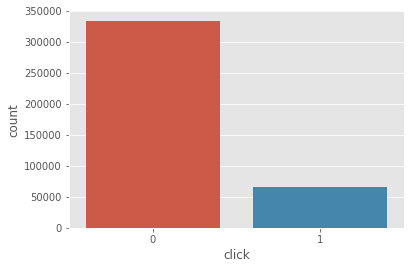

In [13]:
sns.countplot(data_df['click']) #shift +tab
plt.show()

In [14]:
# TODO： 输出正样本的负样本各自的比例
df_click = data_df['click'].value_counts()
for i in df_click.index:
    print(str(i)+': '+str(df_click[i]/len(data_df)))


0: 0.8341095852739632
1: 0.16589041472603683


通过上述的数据，可以很容易看出被点击的次数要远小于没有被点击的次数。所以这个数据是不平衡的数据。但这个不平衡还没有那么严重。其实不平衡严重时，负样本和正样本比例有可能1000：1， 甚至更悬殊。 由于样本的不平衡，使用准确率是不明智的，所以评估指标我们选用``F1-score``. 如果对这部分不熟，请看第7章的视频。 

#### ``hour``特征 ####
时间特征有可能对我们帮助，比如是否凌晨点击率要低于早上的，是否早上的要低于下午的？ 从直观上理解其实是有帮助的。 但由于在这个项目中，我们只提取了前40万个样本，有可能时间上的差别不大（我们要知道一个大的平台，仅仅1分钟就可以收集到数十万到几百万以上的样本）。 但是，不管怎样，打印一下``hour``特征相关的信息看看：

In [15]:
data_df.hour.describe()

count                  399999
unique                      3
top       2014-10-21 02:00:00
freq                   143551
first     2014-10-21 00:00:00
last      2014-10-21 02:00:00
Name: hour, dtype: object

其实从上述的结果中可以看到，时间的区间为10-21的00点到10-21的02点，也就是2个小时的间隔。所以在使用这个特征的时候，可以把小时的特征提取出来，因为日期都是一样的（这部分没价值）。 

In [16]:
data_df['site_category'].unique()#广告类型

array(['28905ebd', '0569f928', 'f028772b', '50e219e0', '3e814130',
       '76b2941d', 'f66779e6', '335d28a8', '72722551', '75fa27f6',
       '110ab22d', 'c0dd3be3', 'bcf865d9', 'a818d37a', '42a36e14',
       'e787de0e', '5378d028', '9ccfa2ea', '70fb0e29', 'dedf689d',
       '8fd0aea4'], dtype=object)

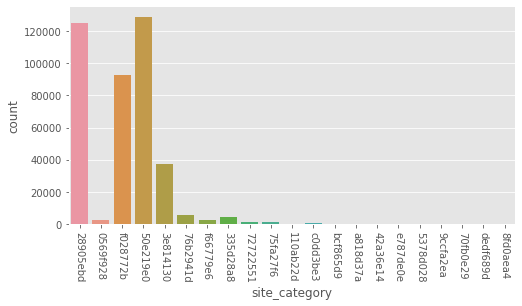

In [17]:
f, ax= plt.subplots(figsize = (8, 4))
sns.countplot(data_df['site_category']) #广告类型
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90) #将Xlable 竖着显示

plt.show()# 可以不要，有%matplotlib inline

<Figure size 432x288 with 0 Axes>

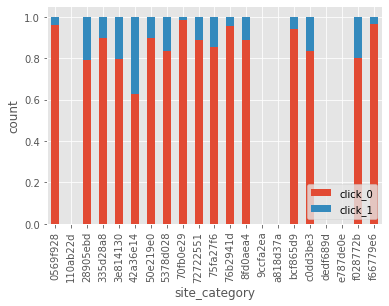

In [18]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

click_0 = data_df.site_category[data_df.click == 0].value_counts()  #groupby 也可以实现
click_1 = data_df.site_category[data_df.click == 1].value_counts()

df=pd.DataFrame({'click_0':click_0/(click_0+click_1), 'click_1':click_1/(click_0+click_1)})
df.plot(kind='bar', stacked=True)

plt.xlabel("site_category")
plt.ylabel("count")
plt.show()


‘42a36e14’类广告，点击数与“点击数/总数”最高。

### 属性与点击结果的关联统计：

In [19]:
data_df['device_type'].unique() # 设备类型

array([1, 0, 4, 5])

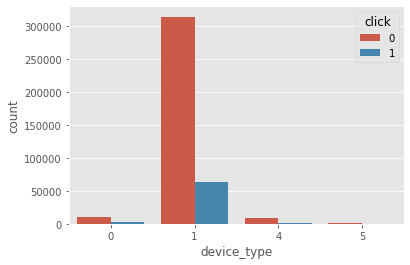

In [20]:
#device_type 设备类型与点击
sns.countplot(x = "device_type", hue = "click", data = data_df) #hue 

#### ``banner_pos``特征 ####
这是广告投放的位置，从直观上来看对广告点击的结果影响比较大，所以做一下可视化的分析并更好地理解这个特征。首先来看一下``banner_pos``的取值范围。 

In [21]:
data_df['banner_pos'].unique() #广告投放的位置

array([0, 1, 4, 5, 2, 7])

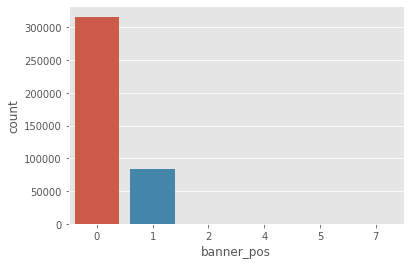

In [22]:
sns.countplot(data_df['banner_pos']) #广告位置
plt.show()

从这个结果里可以看出，它的范围是0-7， 但中间不包含3和6， 有可能是我们的训练数据不全。 对于这些数据请不要理所当然地理解为它表示的是具体的位置信息，比如1代表最前面的位置... 因为我们也不知道它的编码规则是怎么样的。但不管怎样，我们可以通过可视化方式来大概了解一下每一个位置对点击率的影响。 

> ``问题4（TODO）``: 通过可视化方式来展示每一个位置上的样本总数以及其中被点击和没有被点击的样本个数。需要得到如下的这样的一幅图：
<img src="sample_img1.png" alt="drawing" width="300"/>

In [23]:
# TODO: 输出类似于上述这幅图
click_count = data_df.groupby(['banner_pos'])['click'].value_counts() #https://www.jianshu.com/p/42f1d2909bb6   筛选数据
click_count  

banner_pos  click
0           0        266217
            1         49810
1           0         66955
            1         16484
2           0           110
            1            12
4           0            13
            1             2
5           0           318
            1            45
7           0            30
            1             3
Name: click, dtype: int64

In [24]:
print(click_count.index)

MultiIndex([(0, 0),
            (0, 1),
            (1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (4, 0),
            (4, 1),
            (5, 0),
            (5, 1),
            (7, 0),
            (7, 1)],
           names=['banner_pos', 'click'])


In [25]:
click_count.index.levels[0]

Int64Index([0, 1, 2, 4, 5, 7], dtype='int64', name='banner_pos')

[266217, 66955, 110, 13, 318, 30]
[49810, 16484, 12, 2, 45, 3]


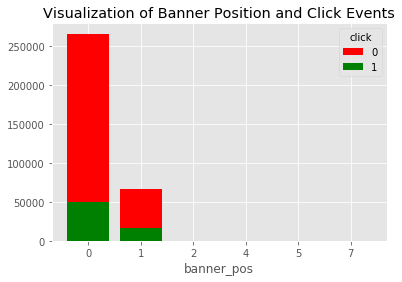

In [26]:
# TODO: 输出类似于上述这幅图
click_count = data_df.groupby(['banner_pos'])['click'].value_counts()
click_count = click_count.to_frame()['click']

banner_pos_idx, v1, v2 = [], [], []
for i in click_count.index.levels[0]: # i 为 0, 1, 2, 4, 5, 7
    banner_pos_idx.append(i)
    v1.append(click_count[i][0])
    v2.append(click_count[i][1])
print(v1)
print(v2)
fig,ax=plt.subplots()

ax.bar(range(len(banner_pos_idx)), v1, color='red')
ax.bar(range(len(banner_pos_idx)), v2, color='green')


ax.legend(['0','1'], title='click')
plt.xticks(range(len(banner_pos_idx)), banner_pos_idx)
ax.set(xlabel='banner_pos',title='Visualization of Banner Position and Click Events')
plt.show()

> ``问题5（TODO)``： 生成完上面的图之后能感觉到这个特征还是蛮重要的，而且由于``banner_pos=2,4,5,7``的样本比较少，在图里不那么直观。所以我们就尝试打印一下一个表格。表格里的每一行针对于的是banner_pos具体的值，另外表格有两列，分别是false和true,  分别代表在某一个banner_pos的样本，有百分之多少的概率不被点击和被点击。 生成出来的表格如下图所示：
<img src="sample_img2.png" alt="drawing" width="200"/>


In [27]:
# TODO: 生成如上面的表格
from operator import add, truediv
v_sum = list(map(add, v1, v2))
v_sum

[316027, 83439, 122, 15, 363, 33]

In [28]:
# TODO: 生成如上面的表格
from operator import add, truediv  #加  除
v_sum = list(map(add, v1, v2))
v1_per = list(map(truediv, v1, v_sum))
v2_per = list(map(truediv, v2, v_sum))

pos_click_per_df = pd.DataFrame({'banner_pos': banner_pos_idx, 'click 0': v1_per, 'click 1': v2_per})  
pos_click_per_df
#print(pos_click_per_df.to_string(index=False))

,banner_pos,click 0,click 1
0,0,0.842387,0.157613
1,1,0.802443,0.197557
2,2,0.901639,0.098361
3,4,0.866667,0.133333
4,5,0.876033,0.123967
5,7,0.909091,0.090909


#### ``site``相关特征 ####

In [29]:
site_features = ['site_id', 'site_domain', 'site_category']
data_df[site_features].describe()
#对于对象数据（例如字符串或时间戳），结果的索引将包括count，unique，top和freq。顶部是最常见的价值。频率是最常见的频率。

,site_id,site_domain,site_category
count,399999,399999,399999
unique,1588,1464,21
top,85f751fd,c4e18dd6,50e219e0
freq,117380,122016,129039


In [30]:
app_features = ['app_id', 'app_domain', 'app_category']
data_df[app_features].describe()

,app_id,app_domain,app_category
count,399999,399999,399999
unique,1450,102,19
top,ecad2386,7801e8d9,07d7df22
freq,282619,298152,284444


> ``问题6（TODO）``:这里重点研究一下，``app_category``特征，看是否跟标签有比较强的关系。 为了理解这一点，对于每一种类型的``app_category``值，请画出``histogram``，展示每一种取值条件下样本被点击或者没有被点击的概率。效果图如下：
<img src="sample_img3.png" alt="drawing" width="300"/>


<Figure size 432x288 with 0 Axes>

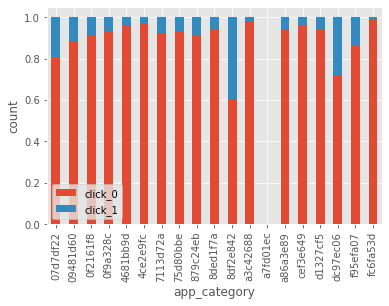

In [31]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

click_0 = data_df.app_category[data_df.click == 0].value_counts()
click_1 = data_df.app_category[data_df.click == 1].value_counts()

df=pd.DataFrame({'click_0':click_0/(click_0+click_1), 'click_1':click_1/(click_0+click_1)})
df.plot(kind='bar', stacked=True) #stacked 决定合并还是分开 False/True
plt.xlabel("app_category")
plt.ylabel("count")
plt.show()

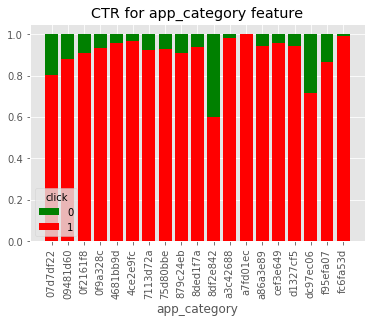

In [32]:
# TODO: 画出如上这幅图。
click_count_2 = data_df.groupby(['app_category'])['click'].value_counts()
click_count_2 = click_count_2.to_frame()['click']

app_click_0, app_click_1, app_category_idx = [], [], []
for i in click_count_2.index.levels[0]:
    temp1, temp2 = 0, 0
    try:
        temp1 = click_count_2[i][0]
    except:
        pass
    try:
        temp2 = click_count_2[i][1]
    except:
        pass
    app_click_0.append(temp1)
    app_click_1.append(temp2)
    app_category_idx.append(i)

app_click_ratio_0 = list(map(add, app_click_0, app_click_1))
app_click_ratio_0 = list(map(truediv, app_click_0, app_click_ratio_0))
app_click_100 = [1]*len(app_click_ratio_0)

fig,ax=plt.subplots()
ax.bar(range(len(app_click_100)), app_click_100, color='green')
ax.bar(range(len(app_click_ratio_0)), app_click_ratio_0, color='red')
ax.legend(['0','1'], title='click', loc='lower left')
plt.xticks(range(len(app_category_idx)), app_category_idx, rotation=90)
ax.set(xlabel='app_category',title='CTR for app_category feature')
plt.show()


####  ``device``相关的特征 ####
查看跟device相关的特征信息

In [33]:
device_features = ['device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type']
data_df[device_features].astype('object').describe()

,device_id,device_ip,device_model,device_type,device_conn_type
count,399999,399999,399999,399999,399999
unique,33226,141109,3757,4,4
top,a99f214a,6b9769f2,8a4875bd,1,0
freq,337979,2747,26552,377567,358831


> ``问题7(TODO)``: 对于不同的``device_conn_type``, 画一个histogram，并表示在不同type的情况下被点击和没有被点击的概率。效果图跟上面的问题（问题6）类似。

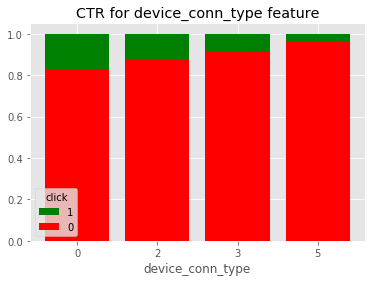

In [34]:
# TODO： 画出device_conn_type和CTR相关的histogram, 参考问题6的效果图。
click_count_2 = data_df.groupby(['device_conn_type'])['click'].value_counts()
click_count_2 = click_count_2.to_frame()['click']

app_click_0, app_click_1, app_category_idx = [], [], []
for i in click_count_2.index.levels[0]:
    temp1, temp2 = 0, 0
    try:
        temp1 = click_count_2[i][0]
    except:
        pass
    try:
        temp2 = click_count_2[i][1]
    except:
        pass
    app_click_0.append(temp1)
    app_click_1.append(temp2)
    app_category_idx.append(i)

app_click_ratio_0 = list(map(add, app_click_0, app_click_1))
app_click_ratio_0 = list(map(truediv, app_click_0, app_click_ratio_0))
app_click_100 = [1]*len(app_click_ratio_0)

fig,ax=plt.subplots()
ax.bar(range(len(app_click_100)), app_click_100, color='green')
ax.bar(range(len(app_click_ratio_0)), app_click_ratio_0, color='red')
ax.legend(['1','0'], title='click', loc='lower left')
plt.xticks(range(len(app_category_idx)), app_category_idx)
ax.set(xlabel='device_conn_type',title='CTR for device_conn_type feature')
plt.show()

### 特征间相关性分析
 我们挑选一些主要的特征，生成特征之间的关联图，查看特征与特征之间的相关性：

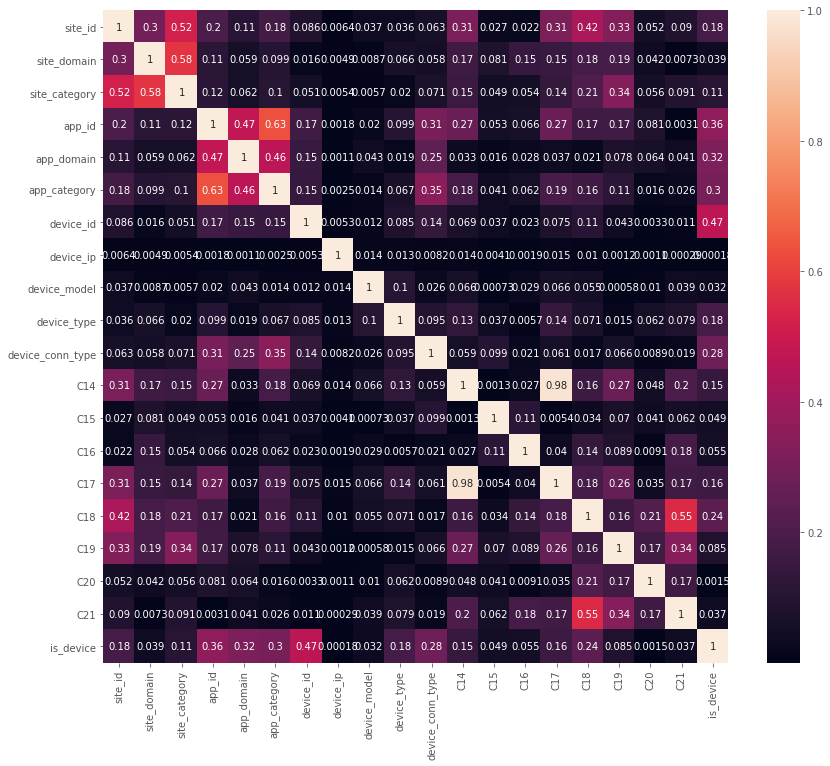

In [35]:
from sklearn import preprocessing

for column in ['C1', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model']:
    enc = preprocessing.LabelEncoder()  # LabelEncoder可以将标签分配一个0—n_classes-1之间的编码
    data_df[column] = enc.fit_transform(data_df[column])    
sub_train = data_df.iloc[:, 4:]
plt.figure(figsize=(14, 12))
sns.heatmap(sub_train.corr().abs(), annot=True)
plt.show()

C14 与 C17线性相关性非常强。

#### ``C1, C14-C21`` 特征####
这些特征没有具体被标记到底是什么意思，有可能是涉及到公司的隐私。 当然，理解一个特征的含义其实挺重要的，但对于这个问题没办法，毕竟他们没有提供描述。但无论如何，也可以通过可视化分析去理解这些特征是否影响点击率。

In [36]:
c_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
data_df[c_features].astype('object').describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,399999,399999,399999,399999,399999,399999,399999,399999,399999
unique,6,520,6,7,149,4,40,152,33
top,2,21647,320,50,1722,0,35,-1,79
freq,376760,40254,380863,382421,125595,218396,192931,233501,125595


> ``问题8（TODO）``： 请画出C1和点击率之间的关系。请参考问题6的样例图。 

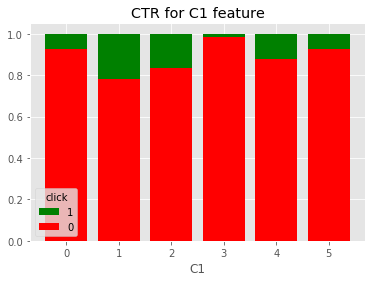

In [37]:
# TODO: 画如上所要求的图
click_count_2 = data_df.groupby(['C1'])['click'].value_counts()
click_count_2 = click_count_2.to_frame()['click']

app_click_0, app_click_1, app_category_idx = [], [], []
for i in click_count_2.index.levels[0]:
    temp1, temp2 = 0, 0
    try:
        temp1 = click_count_2[i][0]
    except:
        pass
    try:
        temp2 = click_count_2[i][1]
    except:
        pass
    app_click_0.append(temp1)
    app_click_1.append(temp2)
    app_category_idx.append(i)

app_click_ratio_0 = list(map(add, app_click_0, app_click_1))
app_click_ratio_0 = list(map(truediv, app_click_0, app_click_ratio_0))
app_click_100 = [1]*len(app_click_ratio_0)

fig,ax=plt.subplots()
ax.bar(range(len(app_click_100)), app_click_100, color='green')
ax.bar(range(len(app_click_ratio_0)), app_click_ratio_0, color='red')
ax.legend(['1','0'], title='click', loc='lower left')
plt.xticks(range(len(app_category_idx)), app_category_idx)
ax.set(xlabel='C1',title='CTR for C1 feature')
plt.show()


### 2. 特征的构造
特征构造对于一个机器学习建模非常重要。它的意思就是基于原有给定的特征基础上构造一些新的特征。构造特征的方法有很多： 1. 在原有的特征基础上做一些转换从而提取特征 2. 不同特征之间利用常规的运算来构造更复杂的特征（比如有特征f1, f2, 则可以通过f1 * f2操作生成新的特征)。
对于特征的构造在之后的项目中会有更详细的介绍，在这里，我们就简单的体验一下。 

首先，我们来看一下数据集里的``hour``字段.

In [38]:
data_df['hour']

0        2014-10-21 00:00:00
1        2014-10-21 00:00:00
2        2014-10-21 00:00:00
3        2014-10-21 00:00:00
4        2014-10-21 00:00:00
                 ...        
399994   2014-10-21 02:00:00
399995   2014-10-21 02:00:00
399996   2014-10-21 02:00:00
399997   2014-10-21 02:00:00
399998   2014-10-21 02:00:00
Name: hour, Length: 399999, dtype: datetime64[ns]

由于我们的数据只是做了部分采样，所以对于所有的样本日期是一致的。唯一不一样的是具体的时间。时间从10-21 00点到 10-21 02点，总共3个不同的时间段来记录。

> ``问题9（TODO）``: 把``hour``这个字段转换成离散型变量，分别是0，1，2。 也就是2014-10-21 00点对应到0， 2014-10-21 01点对应到1， 2014-10-21 02点对应到2. 并把原来的``hour``字段替换一下。

In [39]:
# TODO:  实现问题9
data_df['hour'] = data_df['hour'].dt.hour

In [40]:
data_df['hour'].unique()

array([0, 1, 2])

### 特征工程

In [41]:
#现在来看下每个属性和click的关联度(标准相关系数（standard correlation coefficient，也称作皮尔逊相关系数）)：
corr_matrix = data_df.corr()
corr_matrix["click"].sort_values(ascending = False)

click               1.000000
C16                 0.146317
app_id              0.100042
banner_pos          0.038898
app_domain          0.038499
device_id           0.031226
C19                 0.019546
site_category       0.009685
site_domain         0.003686
C18                 0.000334
device_ip          -0.001518
site_id            -0.008573
device_model       -0.019346
C20                -0.022772
hour               -0.026395
C15                -0.037084
device_conn_type   -0.041631
device_type        -0.045650
C1                 -0.046501
is_device          -0.064775
app_category       -0.083686
C21                -0.103256
C17                -0.117039
C14                -0.122551
Name: click, dtype: float64

在上述特征中，C16与click相关性最大。

site_id、site_domain、app_id、device_model 四个特征存在很多低频率类别。value_counts

In [42]:
data_df.site_id.value_counts()

855     117380
200     114399
1340     16157
577      14711
1387     11574
         ...  
1421         1
141          1
1327         1
1583         1
1449         1
Name: site_id, Length: 1588, dtype: int64

In [43]:
"""
    site_id 处理频率低于20
    将site_id转为二值型
    site_id 出现>20 为 0
    site_id 出现<=20 为 1
"""
site_id_count = data_df.site_id.value_counts()
site_id_category={}
site_id_category[0] = site_id_count.loc[site_id_count>20].index.values
site_id_category[1] = site_id_count.loc[site_id_count<=20].index.values
site_id_C_type_dict = {}
for key, values in site_id_category.items():# 0,XX  1,XX
    for item in values:
        site_id_C_type_dict[str(item)] = key
print(site_id_C_type_dict)


"""site_domain 处理频率低于20
"""
site_domain_count = data_df.site_domain.value_counts()
site_domain_category={}
site_domain_category[0] = site_domain_count.loc[site_domain_count>20].index.values
site_domain_category[1] = site_domain_count.loc[site_domain_count<=20].index.values
site_domain_C_type_dict = {}
for key, values in site_domain_category.items():
    for item in values:
        site_domain_C_type_dict[str(item)] = key


"""app_id 处理频率低于20
"""
app_id_count = data_df.app_id.value_counts()
app_id_category={}
app_id_category[0] = app_id_count.loc[app_id_count>20].index.values
app_id_category[1] = app_id_count.loc[app_id_count<=20].index.values
app_id_C_type_dict = {}
for key, values in app_id_category.items():
    for item in values:
        app_id_C_type_dict[str(item)] = key


"""device_model 处理频率低于200
"""
device_model_count = data_df.device_model.value_counts()
device_model_category={}
device_model_category[0] = device_model_count.loc[device_model_count>200].index.values
device_model_category[1] = device_model_count.loc[device_model_count<=200].index.values
device_model_C_type_dict = {}
for key, values in device_model_category.items():
    for item in values:
        device_model_C_type_dict[str(item)] = key
####
data_df['C_app_id'] = data_df["app_id"].apply(lambda x: x if app_id_C_type_dict.get(x)==0 else 1)
data_df['C_site_id'] = data_df['site_id'].apply(lambda x: x if site_id_C_type_dict.get(x)==0 else 1)
data_df['C_site_domain'] = data_df['site_domain'].apply(lambda x: x if site_domain_C_type_dict.get(x)==0 else 1)
data_df['C_device_model'] = data_df['device_model'].apply(lambda x: x if device_model_C_type_dict.get(x)==0 else 1)



{'855': 0, '200': 0, '1340': 0, '577': 0, '1387': 0, '609': 0, '611': 0, '22': 0, '460': 0, '1493': 0, '852': 0, '633': 0, '656': 0, '1266': 0, '848': 0, '149': 0, '64': 0, '1572': 0, '661': 0, '703': 0, '1313': 0, '837': 0, '554': 0, '982': 0, '1542': 0, '939': 0, '598': 0, '1428': 0, '1146': 0, '1164': 0, '139': 0, '938': 0, '1406': 0, '1373': 0, '557': 0, '152': 0, '679': 0, '876': 0, '77': 0, '1344': 0, '1081': 0, '1523': 0, '92': 0, '1282': 0, '717': 0, '984': 0, '979': 0, '115': 0, '1553': 0, '515': 0, '1399': 0, '1407': 0, '1156': 0, '1431': 0, '929': 0, '355': 0, '759': 0, '995': 0, '242': 0, '1277': 0, '214': 0, '1466': 0, '756': 0, '412': 0, '1200': 0, '1161': 0, '219': 0, '510': 0, '740': 0, '1326': 0, '466': 0, '17': 0, '559': 0, '1289': 0, '993': 0, '992': 0, '161': 0, '779': 0, '1393': 0, '1153': 0, '762': 0, '803': 0, '814': 0, '404': 0, '260': 0, '1242': 0, '1258': 0, '867': 0, '933': 0, '797': 0, '167': 0, '1226': 0, '612': 0, '108': 0, '275': 0, '217': 0, '328': 0, '8

In [44]:
data_df

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C17,C18,C19,C20,C21,is_device,C_app_id,C_site_id,C_site_domain,C_device_model
0,0,0,2,0,200,1387,2,1346,48,0,...,1722,0,35,-1,79,0,1,1,1,1
1,0,0,2,0,200,1387,2,1346,48,0,...,1722,0,35,100084,79,0,1,1,1,1
2,0,0,2,0,200,1387,2,1346,48,0,...,1722,0,35,100084,79,0,1,1,1,1
3,0,0,2,0,200,1387,2,1346,48,0,...,1722,0,35,100084,79,0,1,1,1,1
4,0,0,2,1,1572,838,0,1346,48,0,...,2161,0,35,-1,157,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399994,0,2,2,1,554,356,4,1346,48,0,...,1887,3,39,-1,23,0,1,1,1,1
399995,0,2,2,0,200,1387,2,1346,48,0,...,1722,0,35,-1,79,0,1,1,1,1
399996,1,2,2,1,1340,883,19,1346,48,0,...,1993,2,1063,100084,33,0,1,1,1,1
399997,0,2,2,1,633,106,19,1346,48,0,...,1800,3,167,100079,23,0,1,1,1,1


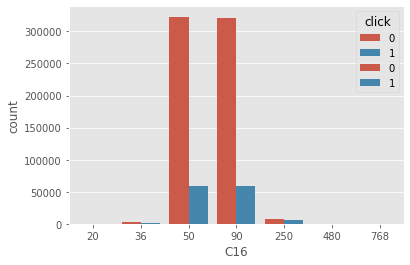

320     380863
300      14883
216       3528
728        722
120          2
1024         1
Name: C15, dtype: int64
----------------------------------------
50     382421
250     13246
36       3528
90        722
480        79
20          2
768         1
Name: C16, dtype: int64


In [45]:
sns.countplot(x="C15", hue="click",data=data_df)
sns.countplot(x="C16", hue="click",data=data_df)
plt.show()
print(data_df['C15'].value_counts())
print("-" * 40)
print(data_df['C16'].value_counts())


In [46]:
#对比一下，二者分布类似，猜测，二者可能组合起来可能代表一个用户标识，或者一种设备标识，因此将二者合为一列。
data_df["C_pix"] = data_df["C15"] + data_df["C16"]
data_df["C_device_type_1"] = data_df["device_type"] +  data_df["C1"]

In [47]:
data_df.iloc[:, :12].head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip
0,0,0,2,0,200,1387,2,1346,48,0,22208,122356
1,0,0,2,0,200,1387,2,1346,48,0,22208,83103
2,0,0,2,0,200,1387,2,1346,48,0,22208,99174
3,0,0,2,0,200,1387,2,1346,48,0,22208,128024
4,0,0,2,1,1572,838,0,1346,48,0,22208,82962


In [48]:
data_df.iloc[:, 12:].head()

,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,is_device,C_app_id,C_site_id,C_site_domain,C_device_model,C_pix,C_device_type_1
0,1038,1,2,15706,320,50,1722,0,35,-1,79,0,1,1,1,1,370,3
1,1648,1,0,15704,320,50,1722,0,35,100084,79,0,1,1,1,1,370,3
2,2020,1,0,15704,320,50,1722,0,35,100084,79,0,1,1,1,1,370,3
3,1464,1,0,15706,320,50,1722,0,35,100084,79,0,1,1,1,1,370,3
4,1743,1,0,18993,320,50,2161,0,35,-1,157,0,1,1,1,1,370,3


### 3. 特征转化
在上述数据中，存在着大量的类别型特征(categorical feature), 这部分的特征我们需要转换成独热编码的形式（one-hot encoding)，如果对这部分不熟悉，请参考之前的视频课程。 比如”男”，“女”这个特征分别转换成(0, 1), (1, 0)这种形式。 

In [49]:
# 由于这两个特征的稀疏性，从特征库中去掉。 但如果计算资源允许，可以加入进来。 
data_df.drop(['device_id', "device_type", 'app_id', 'site_id', 'site_domain', 'device_model',"C1", "C17", 'C15', 'C16'], axis=1, inplace=True)

In [50]:
data_df

,click,hour,banner_pos,site_category,app_domain,app_category,device_ip,device_conn_type,C14,C18,C19,C20,C21,is_device,C_app_id,C_site_id,C_site_domain,C_device_model,C_pix,C_device_type_1
0,0,0,0,2,48,0,122356,2,15706,0,35,-1,79,0,1,1,1,1,370,3
1,0,0,0,2,48,0,83103,0,15704,0,35,100084,79,0,1,1,1,1,370,3
2,0,0,0,2,48,0,99174,0,15704,0,35,100084,79,0,1,1,1,1,370,3
3,0,0,0,2,48,0,128024,0,15706,0,35,100084,79,0,1,1,1,1,370,3
4,0,0,1,0,48,0,82962,0,18993,0,35,-1,157,0,1,1,1,1,370,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399994,0,2,1,4,48,0,121292,0,17212,3,39,-1,23,0,1,1,1,1,370,3
399995,0,2,0,2,48,0,79421,0,15702,0,35,-1,79,0,1,1,1,1,370,3
399996,1,2,1,19,48,0,22265,0,17753,2,1063,100084,33,0,1,1,1,1,370,3
399997,0,2,1,19,48,0,608,0,19950,3,167,100079,23,0,1,1,1,1,370,3


> ``问题10（TODO）`` 数据中的每一个特征，其实都可以看作是类别型特征（离散型）， 所以我们接下来要对所有的特征做独热编码的转换。这个时候总特征的维度就 变成每一个特征独热编码长度之和。 （也就是表格里的unique的之和）。务必要删除原始特征，因为已经把它们转换成了新的独热编码的形式。 

In [51]:
# TODO: 实现对每一个特征的独热编码转换, 并删除原始特征
import sklearn.preprocessing as preprocessing
lenc = preprocessing.LabelEncoder()
C_fields = [ 'hour', 'banner_pos', 'site_category', 'app_domain', 'app_category',
            'device_conn_type', 'C14', 'C18', 'C19', 'C20','C21', 'is_device', 'C_app_id', 'C_site_id', 
            'C_site_domain', 'C_device_model', 'C_pix', 'C_device_type_1']
for f, column in enumerate(C_fields):
    try:
        data_df[column] = lenc.fit_transform(data_df[column])
        data_df[column] = pd.get_dummies(data_df[column], prefix = column)
        print("convert " + column + "...")
    except:
        print('exception: ', column)




convert hour...
convert banner_pos...
convert site_category...
convert app_domain...
convert app_category...
convert device_conn_type...
convert C14...
convert C18...
convert C19...
convert C20...
convert C21...
convert is_device...
convert C_app_id...
convert C_site_id...
convert C_site_domain...
convert C_device_model...
convert C_pix...
convert C_device_type_1...


In [52]:
data_df.head()

,click,hour,banner_pos,site_category,app_domain,app_category,device_ip,device_conn_type,C14,C18,C19,C20,C21,is_device,C_app_id,C_site_id,C_site_domain,C_device_model,C_pix,C_device_type_1
0,0,1,1,0,0,1,122356,0,0,1,0,1,0,1,1,1,1,1,0,0
1,0,1,1,0,0,1,83103,1,0,1,0,0,0,1,1,1,1,1,0,0
2,0,1,1,0,0,1,99174,1,0,1,0,0,0,1,1,1,1,1,0,0
3,0,1,1,0,0,1,128024,1,0,1,0,0,0,1,1,1,1,1,0,0
4,0,1,0,1,0,1,82962,1,0,1,0,1,0,1,1,1,1,1,0,0


### 数据归一化

In [53]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(data_df[['C14','C18','C19','C20','C21']])
data_df[['C14','C18','C19','C20','C21']] = age_scale_param.transform(data_df[['C14','C18','C19','C20','C21']])


In [54]:
# 构造训练数据和测试数据
feature_names = np.array(data_df.columns[data_df.columns != 'click'].tolist())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_df[feature_names].values, 
    data_df['click'].values,
    test_size=0.2,
    random_state=42
)

In [55]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(319999, 19) (80000, 19) (319999,) (80000,)


### 4. 特征选择
由于转换成了独热编码的形式，你会发现数据的维度一下子变多了，从几十维编程了上千维。接下来，我们来做个特征选择。我们可以回顾一下课程中提到的特征选择的方法， 也思考一下哪一种可能不太适合这个场景。 很显然生成所有的可能性方法和贪心方法是不太适合的，因为特征维度很高，计算量就变得特别大。在这里，我们使用基于L1+逻辑回归的方法。

> ``问题11（TODO）``： 使用基于L1的方法，请参考https://scikit-learn.org/stable/modules/feature_selection.html （SelectFromModel部分）。 我们使用的模型是逻辑回归 + L1的正则。 我们都知道L1正则会产生稀疏解，相当于帮我们选出特征。具体的方法是： 对于每一种可能的C值（代表正则的强弱)做交叉验证，从中选择效果最好的C值， 而且对于这个C值，我们有对应的选出来的特征。 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('always')

params_c = np.logspace(-4, 1, 11) #浮点型，默认：1.0；其值等于正则化强度的倒数，为正的浮点数。数值越小表示正则化越强。

# TODO: 循环每一个C值，计算交叉验证后的F1-SCORE， 最终选择最好的C值c_best， 然后选出针对这个c_best对应的特征。 务必要使用L1正则。
#       对于实现，有很多方法，自行选择合理的方法就可以了。 关键是包括以下模块：1. 逻辑回归   2. 交叉验证  3. L1正则  4. SelectFromModel

fold = 5
kf = KFold(n_splits=fold, random_state=2020, shuffle=True)
f1_score_list = []
for c in tqdm(params_c):
    model = LogisticRegression(penalty='l1', solver='saga', C=c)
    f1_sum = 0
    for train_idx, valid_idx in tqdm(kf.split(X_train)):
        model.fit(X_train[train_idx], y_train[train_idx])
        y_pred = model.predict(X_train[valid_idx])
        f1_sum += f1_score(y_train[valid_idx], y_pred, average='weighted')
    f1_ave = f1_sum/fold
    f1_score_list.append(f1_ave)


  0%|          | 0/11 [00:00<?, ?it/s]
0it [00:00, ?it/s]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

1it [00:12, 12.73s/it]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

2it [00:25, 12.61s/it]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

3it [00:37, 12.62s/it]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conver

2it [00:29, 14.37s/it]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

3it [00:44, 14.60s/it]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

4it [00:59, 14.78s/it]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

5it [01:14, 14.91s/it]
 64%|██████▎   | 7/11 [07:37<04:32, 68.19s/it]
0it [00:00, ?it/s]/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [57]:
params_c

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01])

In [58]:
# 求出c_best
c_best = params_c[f1_score_list.index(max(f1_score_list))]

In [59]:
c_best

0.0001

In [61]:
# 通过c_best值，重新在整个X_train里做训练，并选出特征。
lr_clf = LogisticRegression(penalty='l2', C=c_best)
lr_clf.fit(X_train, y_train) # 在整个训练数据重新训练

select_model = SelectFromModel(lr_clf, prefit=True)
selected_features = select_model.get_support()  # 被选出来的特征

# 重新构造feature_names
feature_names = feature_names[selected_features]

# 重新构造训练数据和测试数据
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]


In [62]:
print(len(feature_names))
print(feature_names)

1
['device_ip']


### 5. 模型训练与评估
选择完特征之后，我们来构建模型并做训练。这部分的内容跟第一个项目没什么太大区别，无非就是选择模型之后，通过交叉验证来学习最好的超参数。在这里我们使用两种类型的模型，分别是逻辑回归+L2正则，以及决策树。 第二种模型还没有讲解，但没关系，我们只是在这里调用一下而已，在之后的章节里会详细地涉及到。 


### 5.1 使用逻辑回归模型
> ``问题12（TODO）``在我们选择特征的时候其实也用了逻辑回归，但要记住，选特征的时候用的是L1的正则。但是在真正来训练最终版本模型的时候我们通常都是使用L2正则。所以这里就按照这个逻辑来训练一个逻辑回归模型。需要注意的一点是：评价标准使用F1-SCORE, 包括在交叉验证阶段。 

In [63]:
from sklearn.metrics import classification_report  #  这个用来打印最终的结果，包括F1-SCORE

params_c = np.logspace(-5,2,15) # 也可以自行定义一个范围

# TODO: 实现逻辑回归 + L2正则， 利用GrisSearchCV

model = GridSearchCV(LogisticRegression(penalty='l2', solver='saga'), {'C':params_c}, cv=5)
model.fit(X_train, y_train)

# 输出最好的参数 
print(model.best_params_)


{'C': 1e-05}


In [64]:
# TODO: 在测试数据上预测，并打印在测试集上的结果
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     66743
           1       0.00      0.00      0.00     13257

    accuracy                           0.83     80000
   macro avg       0.42      0.50      0.45     80000
weighted avg       0.70      0.83      0.76     80000



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.2 使用决策树模型
> ``问题13（TODO）：``在这里，我们使用决策树算法做分类。这部分内容还没有讲到，但没关系，在这里只是用来调用。在PART3里会涉及到决策树的细节。 决策树本身有很多超参数需要调节，所以调节决策树的复杂度要远高于逻辑回归模型。决策树的使用请参考: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [65]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

params_min_samples_split = np.linspace(5, 20, 4)
params_min_samples_leaf = np.linspace(2, 10, 5)
params_max_depth = np.linspace(4, 10, 4)

params_min_samples_split = params_min_samples_split.astype(int)
params_min_samples_leaf = params_min_samples_leaf.astype(int)
params_max_depth = params_max_depth.astype(int)

# TODO: 构造决策树，并做交叉验证。 除了上面三个参数，其他参数用默认的。 

para_dict = {}
para_dict['min_samples_split'] = params_min_samples_split
para_dict['min_samples_leaf'] = params_min_samples_leaf
para_dict['max_depth'] = params_max_depth

# model = DecisionTreeClassifier()
# cross_val_score(model, X_train, y_train, fit_params=para_dict, cv=10)
model = GridSearchCV(DecisionTreeClassifier(), para_dict, cv=3, verbose=10)
model.fit(X_train, y_train)

# 输出最好的参数 
print(model.best_params_)

/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=10 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=10, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=10, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=10 ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=10, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=15 ...........
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=15, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=15 ...........


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=15, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=15 ...........
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=15, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=20 ...........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=20, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=20, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=20, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=0.834, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=4, min_sample

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=10, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=10, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=10, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=15 ...........
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=15, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=15 ...........
[CV]  max_depth=6, min_samples_leaf=2, min_sampl

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=15 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=15, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=15 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=15, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=15 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=15, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=20, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=20, score=0.834, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=6, min_samples_leaf=10, 

[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=20, score=0.834, total=   0.2s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=20, score=0.834, total=   0.2s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=20, score=0.834, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=5 ...........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=5, score=0.834, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=5 ...........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=5, score=0.834, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=5 ...........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=5, score=0.834, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_sa

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=5, score=0.834, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=5 ...........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=5, score=0.834, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=10, score=0.834, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=10, score=0.834, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=10, score=0.834, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=15 ..........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=15, score=0.834, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=15 ..........
[CV]  max_depth=10, min_samples_leaf=8, mi

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   51.4s finished


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [66]:
# TODO: 在测试数据上预测，并打印在测试集上的结果

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     66743
           1       0.00      0.00      0.00     13257

    accuracy                           0.83     80000
   macro avg       0.42      0.50      0.45     80000
weighted avg       0.70      0.83      0.76     80000



### 5.3 利用启发式算法来调节参数（选做部分, 不计为分数）
在课程中，我们讲过启发式算法的大致思路。 在这里，我们使用贝叶斯优化方法去选择超参数，具体的使用方法请参考： https://github.com/fmfn/BayesianOptimization  也需要提前安装好这个库，请按照此链接中的方法来安装。 

同时，我们在使用决策树的过程中也发现参数数量多，花费的时间也很长。这种现象在参数越多的时候越明显。所以，可以适当采用启发式算法比如贝叶斯优化。贝叶斯优化整体的思路是构建在贝叶斯模型之上的，内核包括高斯过程。具体细节可以参考Adam Ryans（princeton)教授的相关文章。 

请认真读一下上述github的内容，应该可以大致理解它的主要作用。然后按照里面写的方法来实现决策树上的参数优化。 

In [67]:
params_min_samples_split = np.linspace(5, 20, 4)
# array([ 5., 10., 15., 20.])
params_min_samples_leaf = np.linspace(2, 10, 5)
# array([ 2.,  4.,  6.,  8., 10.])
params_max_depth = np.linspace(4, 10, 4)
# array([ 4.,  6.,  8., 10.])

para_dict = {}
para_dict['min_samples_split'] = (1, len(params_min_samples_split)+.99)
para_dict['min_samples_leaf'] = (1, len(params_min_samples_leaf)+.99)
para_dict['max_depth'] = (1, len(params_max_depth)+.99)
para_dict

{'min_samples_split': (1, 4.99),
 'min_samples_leaf': (1, 5.99),
 'max_depth': (1, 4.99)}

In [68]:
from bayes_opt import BayesianOptimization  #https://www.cnblogs.com/marsggbo/p/10242962.html

params_min_samples_split = np.linspace(5, 20, 4)
# array([ 5., 10., 15., 20.])
params_min_samples_leaf = np.linspace(2, 10, 5)
# array([ 2.,  4.,  6.,  8., 10.])
params_max_depth = np.linspace(4, 10, 4)
# array([ 4.,  6.,  8., 10.])

# TODO: 使用贝叶斯优化去选择超参数

def decision_tree_predictor(min_samples_split, min_samples_leaf, max_depth):
    # discrete mapping
    min_samples_split = int(min_samples_split)*5
    min_samples_leaf = int(min_samples_leaf)*2
    max_depth = int(max_depth)*2+2
        
    model = DecisionTreeClassifier(min_samples_split=int(min_samples_split), min_samples_leaf=int(min_samples_leaf), max_depth=int(max_depth))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_ =  f1_score(y_test, y_pred, average='weighted')
    return f1_
    
    
para_dict = {}
para_dict['min_samples_split'] = (1, len(params_min_samples_split)+.99)
para_dict['min_samples_leaf'] = (1, len(params_min_samples_leaf)+.99)
para_dict['max_depth'] = (1, len(params_max_depth)+.99)
# plus .99 to approximate to equal space 

new_optimizer = BayesianOptimization(
    f=decision_tree_predictor,
    pbounds=para_dict,
    verbose=2,
    random_state=7,
)

new_optimizer.maximize(n_iter=10)


print(len(new_optimizer.space))
print(new_optimizer.max)

# for i, res in enumerate(new_optimizer.res):
#     print("Iteration {}: \n\t{}".format(i, res))

# TODO: 在测试数据上预测，并打印在测试集上的结果
best_min_samples_split = new_optimizer.max['params']['min_samples_split']
best_min_samples_leaf = new_optimizer.max['params']['min_samples_leaf']
best_max_depth = new_optimizer.max['params']['max_depth']

best_min_samples_split = int(best_min_samples_split)*5
best_min_samples_leaf = int(best_min_samples_leaf)*2
best_max_depth = int(best_max_depth)*2+2
print("best_min_samples_split",best_min_samples_split)
print("best_min_samples_leaf",best_min_samples_leaf)
print("best_max_depth",best_max_depth)
model = DecisionTreeClassifier(min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, max_depth=best_max_depth)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

ModuleNotFoundError: No module named 'bayes_opt'

### 5.4 使用XGBoost做分类（选做部分, 不计为分数）
还有一类算法叫做XGBoost, 这是目前工业界和各类比赛最常用的算法之一。 我们会在PART3里做详细的讲解，但感兴趣的朋友可以尝试一下。 它是一种集成式的方法，相当于多位专家共同去决策，所以模型既稳定效果也不错。这个模型也需要单独安装，具体安装请见： https://pypi.org/project/xgboost/  在linux和mac os上安装起来比较简单，但windows上可能会有各种问题出现，如在windows上使用，请参考： https://xgboost.readthedocs.io/en/latest/build.html




In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
# TODO: 训练XGBoost模型  提示： 使用XGBClassifier。 至于超参数，可以试着去看一下官方文档，然后多尝试尝试。 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# https://blog.csdn.net/han_xiaoyang/article/details/52665396
params = {
    'learning_rate': 0.1,
    'n_estimators': 40,
    'max_depth': 5,
    'min_child_weight': 6,
    'seed': 0,
    'subsample': 0.8,  #这个参数控制对于每棵树，随机采样的比例。
    'colsample_bytree': 0.8, #用来控制每棵随机采样的列数的占比(每一列是一个特征)。
    'objective':'binary:logistic',
    'reg_alpha': 0,  #权重的L1正则化项
    'reg_lambda': 1} #权重的L2正则化项

clf = XGBClassifier(**params)
clf.fit(X_train, y_train, eval_metric='auc', verbose=True, eval_set=[(X_val, y_val)], early_stopping_rounds=30)


# TODO: 在测试数据上预测，并打印在测试集上的结果

y_pred = clf.predict(X_test)
y_pro = clf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, predictions))

恭喜你，完成第一次作业。 希望通过完成此作业，对建模有更深入的理解。 特别是对于数据的理解、特征选择以及超参数的选择等技术点。 